# Made by Benmalek Zohir
## Link to the dataset : 
https://www.kaggle.com/datasets/ironwolf437/laptop-price-dataset

# The imports : 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import pickle
import joblib


# Lecture and consultation 

In [3]:
df = pd.read_csv('laptop_dataset.csv')

In [4]:
df.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [5]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [7]:
# Check basic information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Descriptive statistics for numerical features
print(df.describe())

# Unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

# Few plots

<Figure size 1500x1000 with 0 Axes>

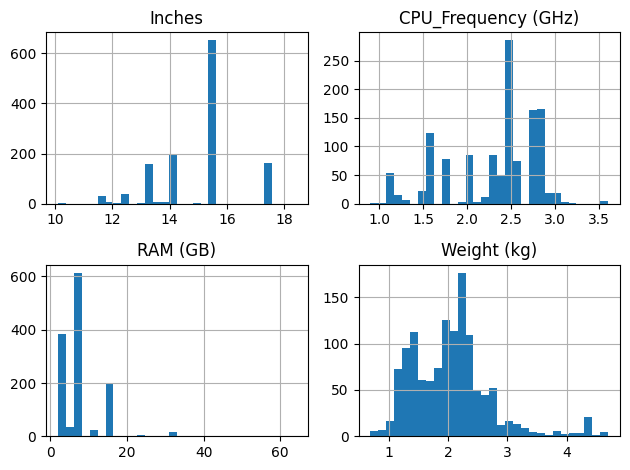

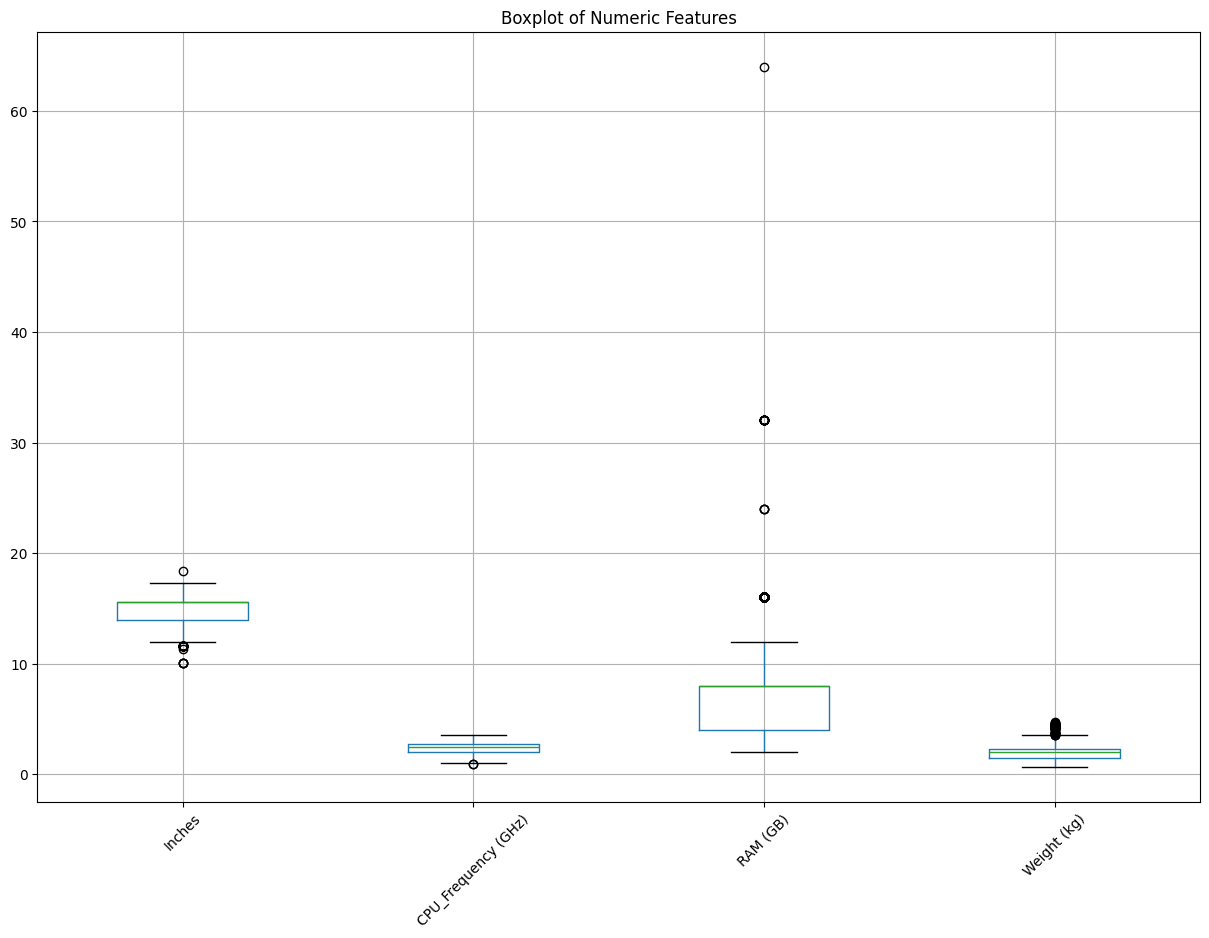

In [ ]:
# Separate features and target
X = df.drop(columns=['Price (Euro)'])
y = df['Price (Euro)']
# Numeric features distribution
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15,10))
X[numeric_features].hist(bins=30)
plt.tight_layout()
plt.show()
# Boxplots for numeric features
plt.figure(figsize=(15,10))
X[numeric_features].boxplot()
plt.title('Boxplot of Numeric Features')
plt.xticks(rotation=45)
plt.show()

# Heat map

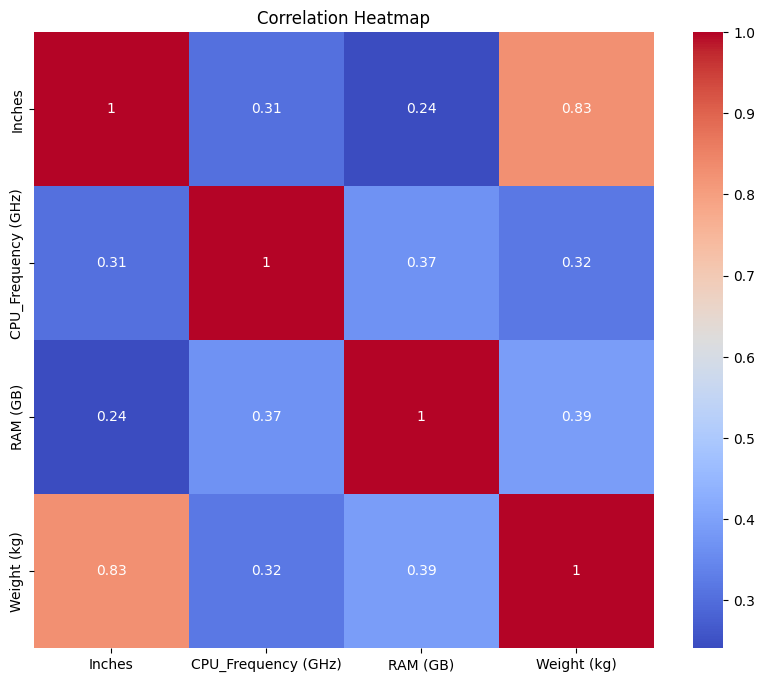

In [9]:
# Correlation matrix for numeric features
plt.figure(figsize=(10,8))
sns.heatmap(X[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Label encoding

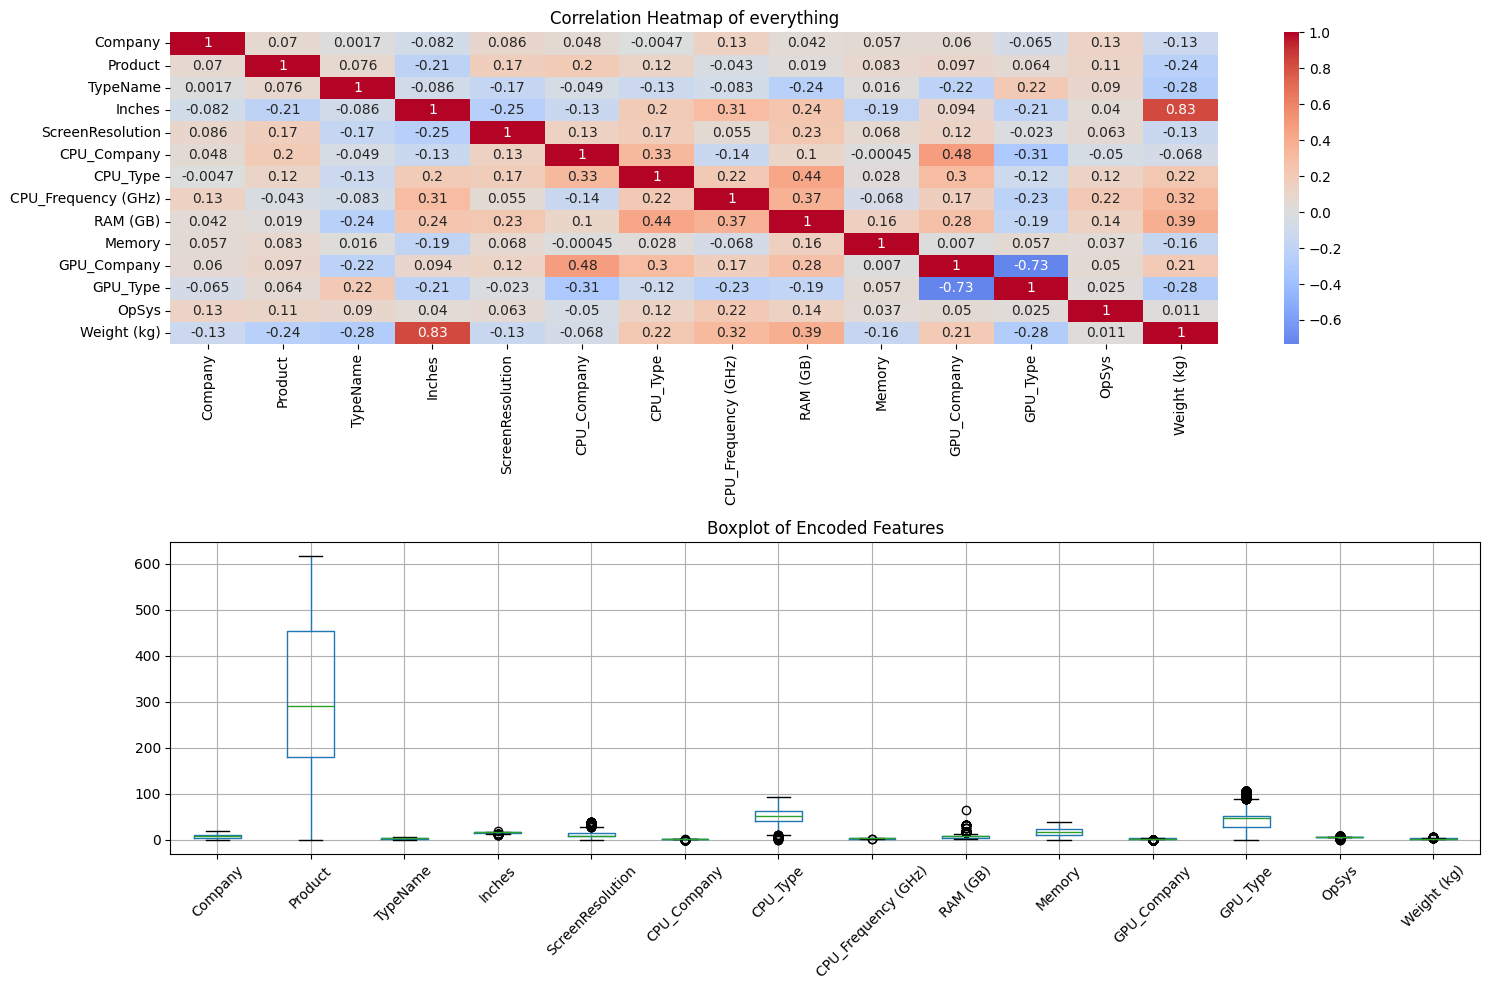


Unique values in 'Company':
Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

Encoding mapping:
{'Acer': 0, 'Apple': 1, 'Asus': 2, 'Chuwi': 3, 'Dell': 4, 'Fujitsu': 5, 'Google': 6, 'HP': 7, 'Huawei': 8, 'LG': 9, 'Lenovo': 10, 'MSI': 11, 'Mediacom': 12, 'Microsoft': 13, 'Razer': 14, 'Samsung': 15, 'Toshiba': 16, 'Vero': 17, 'Xiaomi': 18}

Unique values in 'Product':
Product
XPS 13                                 30
Inspiron 3567                          25
250 G6                                 21
Vostro 3568                            19
Legion Y520-15IKBN                     19
                                       ..
VivoBook E201NA                         1
Ideapad 520-15IKBR   

In [10]:
# Create a copy of the dataframe to avoid modifying the original
X_encoded = X.copy()

# Dictionary to store the LabelEncoder mappings for each column
label_encoders = {}

# Label Encode categorical columns
for col in X_encoded.columns:
    if not pd.api.types.is_numeric_dtype(X_encoded[col]):
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])
        label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Visualizations
plt.figure(figsize=(15, 10))

# Correlation heatmap
plt.subplot(2, 1, 1)
sns.heatmap(X_encoded.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of everything')

# Boxplot of encoded features
plt.subplot(2, 1, 2)
X_encoded.boxplot(figsize=(15, 6))
plt.title('Boxplot of Encoded Features')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Count of original categorical values before encoding and mapping
for column in X.columns:
    if not pd.api.types.is_numeric_dtype(X[column]):
        print(f"\nUnique values in '{column}':")
        print(X[column].value_counts())
        print("\nEncoding mapping:")
        print(label_encoders[column])


# Final X

In [18]:
X_encoded.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg)
0,1,300,4,13.3,23,1,40,2.3,8,4,2,56,8,1.37
1,1,301,4,13.3,1,1,40,1.8,8,2,2,50,8,1.34
2,7,50,3,15.6,8,1,46,2.5,8,16,2,52,4,1.86
3,1,300,4,15.4,25,1,54,2.7,16,29,0,76,8,1.83
4,1,300,4,13.3,23,1,40,3.1,8,16,2,57,8,1.37


# Saving the encoders

In [ ]:
# Save all encoders to a file
with open("label_encoders.pkl", "wb") as file:
    pickle.dump(label_encoders, file)

# Saving feature names

In [20]:
# Extract feature names
feature_names = X_encoded.columns.tolist()

# Save feature names to a pickle filefeature_names.pklfeature_names.pkl
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

# Train and evaluation

In [ ]:
def evaluate_model(y_true, y_pred):
    """feature_names.pkl
    Calculate regression metrics
    
    Args:
        y_true (array-like): True target values
        y_pred (array-like): Predicted target values
    
    Returns:
        dict: Performance metrics
    """
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }

def compare_models(X_encoded, y, test_size=0.2, random_state=42):   
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y, test_size=test_size, random_state=random_state
    )
    
    # Define models to compare
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(random_state=random_state),
        'Lasso Regression': Lasso(random_state=random_state),
        'Random Forest': RandomForestRegressor(random_state=random_state),
        'Gradient Boosting': GradientBoostingRegressor(random_state=random_state),
        'Support Vector Regression': SVR(),
        'XGBoost': XGBRegressor(random_state=random_state)
    }
    
    # Store results
    results = []
    
    # Evaluate each model
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict
        y_pred = model.predict(X_test)
        
        # Evaluate
        metrics = evaluate_model(y_test, y_pred)
        
        # Cross-validation score
        cv_scores = cross_val_score(
            model, X_encoded, y, 
            scoring='neg_mean_squared_error', 
            cv=5
        )
        
        # Store results
        results.append({
            'Model': name,
            'MAE': metrics['MAE'],
            'MSE': metrics['MSE'],
            'RMSE': metrics['RMSE'],
            'R2': metrics['R2'],
            'CV Score (Mean)': -cv_scores.mean(),
            'CV Score (Std)': cv_scores.std()
        })
    
    # Convert to DataFrame and sort by RMSE
    results_df = pd.DataFrame(results)
    return results_df.sort_values('RMSE')

# Feature importance for the best model (Random Forest)
def get_feature_importance(X_encoded, y, model_type=RandomForestRegressor):
    """
    Get feature importance for a given model.
    
    Args:
        X_encoded (pd.DataFrame): Encoded feature matrix
        y (pd.Series): Target variable
        model_type (sklearn estimator): Model to use for feature importance
    
    Returns:
        pd.DataFrame: Sorted feature importances
    """
    # Fit the model
    model = model_type(random_state=42)
    model.fit(X_encoded, y)
    
    # Get feature importances
    importances = pd.DataFrame({
        'feature': X_encoded.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    return importances


# Main executionfeature_names.pkl

# Compare models
print("Model Comparison Results:")
results = compare_models(X_encoded, y)
print(results)

# Get feature importance for the best performing model
print("\nFeature Importance:")
feature_imp = get_feature_importance(X_encoded, y)
print(feature_imp)


# Usage
# results, feature_importance = main(X, y)

Model Comparison Results:
                       Model         MAE            MSE        RMSE        R2  \
6                    XGBoost  151.324387   48309.883377  219.795094  0.902668   
4          Gradient Boosting  172.239179   56292.449586  237.260299  0.886585   
3              Random Forest  165.344835   65795.704069  256.506733  0.867438   
2           Lasso Regression  271.824201  151317.653369  388.995698  0.695133   
1           Ridge Regression  272.155283  151347.005625  389.033425  0.695073   
0          Linear Regression  272.223505  151366.895884  389.058988  0.695033   
5  Support Vector Regression  506.767137  536743.208328  732.627605 -0.081404   

   CV Score (Mean)  CV Score (Std)  
6     78403.071630    24096.710698  
4     79468.349184    20067.906439  
3     85383.730747    16292.851847  
2    166521.416184    34778.473196  
1    166302.672575    34502.851663  
0    166295.128172    34471.890344  
5    514149.578641    82867.936224  

Feature Importance:
        

# Saving the best model

In [ ]:
def save_best_model(X_encoded, y, results, save_path='best_model.pkl'):
    """
    Save the best performing model based on comparison results.
    
    Args:
        X_encoded (pd.DataFrame): Feature matrix
        y (pd.Series): Target variable
        results (pd.DataFrame): Model comparison results
        save_path (str): Path to save the bfeature_names.pklest model
    
    Returns:
        None
    """
    # Identify the best model
    best_model_name = results.iloc[0]['Model']
    print(f"Best Model: {best_model_name}")
    
    # Map model names to actual models
    model_mapping = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(random_state=42),
        'Lasso Regression': Lasso(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'Support Vector Regression': SVR(),
        'XGBoost': XGBRegressor(random_state=42)
    }
    
    # Get the best model
    best_model = model_mapping[best_model_name]
    
    # Train the best model on the entire dataset
    best_model.fit(X_encoded, y)
    
    # Save the model
    joblib.dump(best_model, save_path)
    print(f"Best model saved to {save_path}")

# Call the function
save_best_model(X_encoded, y, results)


Best Model: XGBoost
Best model saved to best_model.pkl
